Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib as mlp
import plotly.express as px
import calendar
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Set plot style

In [198]:
sns.set(font_scale=1.5)

plt.style.use('ggplot')

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 10,6

Read dataframe

In [3]:
accidents = pd.read_csv("../data/accidents_2017.csv")

Function to clean columns

In [4]:
def clean_columns(dataframe):
    for column in dataframe:
        dataframe.rename(columns = {column : column.lower().replace(" ", "_")},
                        inplace = 1)
    return dataframe

DF has 15 columns, 10339 rows, no null values, month/day/hour columns separeted as object and integer types.

Data cleaning

In [5]:
#clean column names
accidents = clean_columns(accidents)
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10339 non-null  object 
 1   district_name      10339 non-null  object 
 2   neighborhood_name  10339 non-null  object 
 3   street             10339 non-null  object 
 4   weekday            10339 non-null  object 
 5   month              10339 non-null  object 
 6   day                10339 non-null  int64  
 7   hour               10339 non-null  int64  
 8   part_of_the_day    10339 non-null  object 
 9   mild_injuries      10339 non-null  int64  
 10  serious_injuries   10339 non-null  int64  
 11  victims            10339 non-null  int64  
 12  vehicles_involved  10339 non-null  int64  
 13  longitude          10339 non-null  float64
 14  latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [158]:
accidents.district_name.unique()

array(['Unknown', 'Sant Martí', 'Ciutat Vella', 'Eixample',
       'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia',
       'Horta-Guinardó', 'Nou Barris', 'Sant Andreu'], dtype=object)

In [159]:
accidents.neighborhood_name.unique()

array(['Unknown', "el Camp de l'Arpa del Clot", 'el Clot',
       'Sant Martí de Provençals', 'la Verneda i la Pau',
       'el Besòs i el Maresme', 'Provençals del Poblenou', 'el Poblenou',
       'Diagonal Mar i el Front Marítim del Poblenou',
       'el Parc i la Llacuna del Poblenou', 'el Raval',
       'la Vila Olímpica del Poblenou', 'el Barri Gòtic',
       'Sant Pere, Santa Caterina i la Ribera', 'la Barceloneta',
       'Sant Antoni', "la Nova Esquerra de l'Eixample",
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample", 'el Fort Pienc', 'el Poble-sec',
       'la Marina del Prat Vermell', 'la Marina de Port', 'la Bordeta',
       'Hostafrancs', 'la Font de la Guatlla', 'Sants', 'Sants - Badal',
       'les Corts', 'la Maternitat i Sant Ramon', 'Pedralbes',
       'Sant Gervasi - Galvany', 'Sarrià', 'Sant Gervasi - la Bonanova',
       'les Tres Torres', 'el Putxet i el Farró',
       'Vallvidrera, el Tibidabo i les Planes',
       'V

In [7]:
# check for duplicates
accidents.duplicated().sum() 
 

4

In [8]:
#remove duplicates
accidents.drop_duplicates(inplace = True)#now accidentd.info() gives 1335 entries

In [14]:
#add a year column which contains 2017 for all rows
accidents['year'] = 2017

In [15]:
# convert month into integers using datetime
accidents['month'] = pd.to_datetime(accidents['month'], format='%B').dt.month.astype(str)

In [16]:
#datetime join month, day, year, and hour and add to new 'date' column
accidents['date'] = pd.to_datetime(accidents[["year", "month", "day", "hour"]])
accidents['date_no_hour'] = pd.to_datetime(accidents[["year", "month", "day"]])

 

In [22]:
#drop year, month, day, hour columns
# accidents.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

Distribution of accidents by month

Text(0, 0.5, 'Number of Accidents')

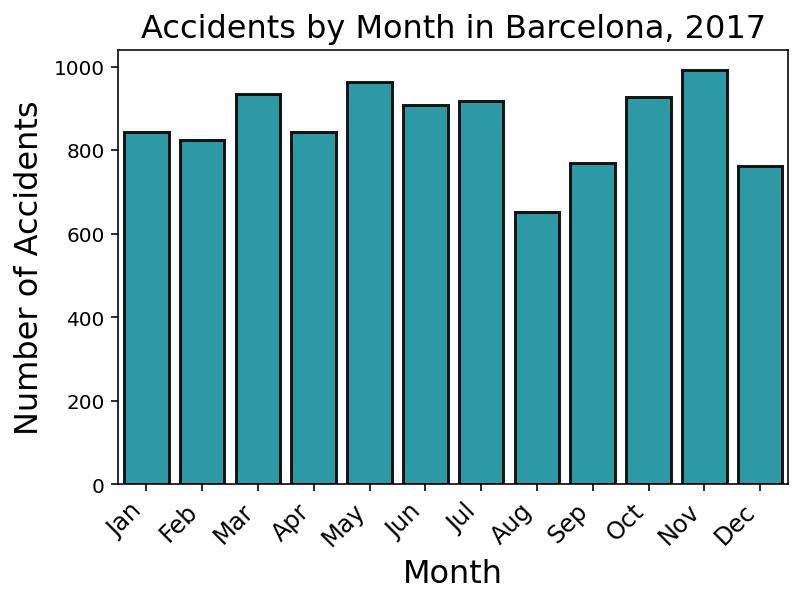

In [20]:
#Distribution of accidents by month
p = sns.countplot(x=accidents['date'].dt.month, data=accidents, color='#00A0B0', edgecolor='black', linewidth=1.5, alpha=0.9)
#return month names with "%b" to strftime
p.set(xticklabels=[calendar.month_abbr[i] for i in range(1,13)]);
# rotate x-axis labels
plt.setp(p.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='large');
plt.title('Accidents by Month in Barcelona, 2017', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)

Distribution of accidents by day of the week

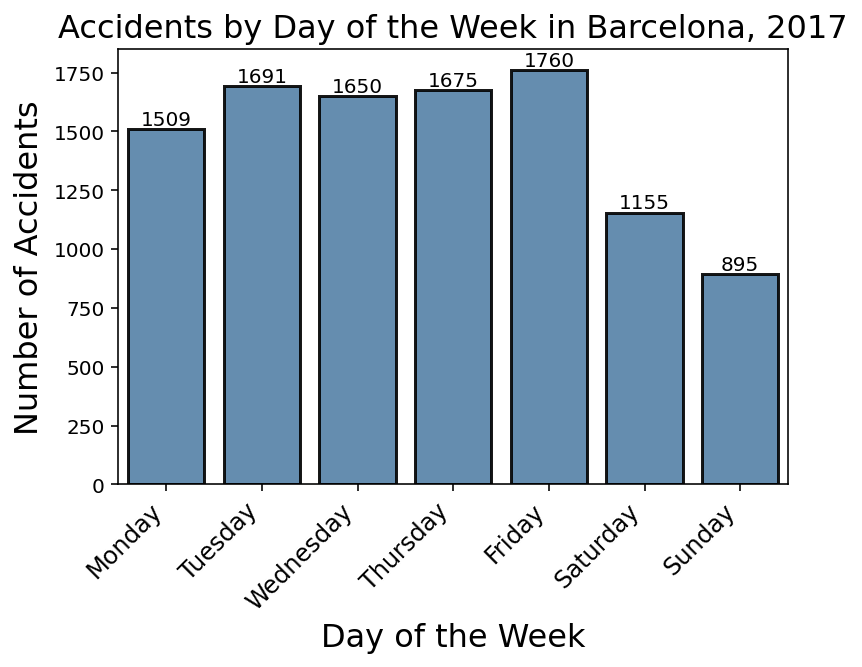

In [24]:
# Distribution of accidents by day of the week
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
p = sns.countplot(x='weekday', data=accidents, color='SteelBlue', order=order, edgecolor='black', linewidth=1.5, alpha=0.9 )
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large');
p.bar_label(p.containers[0]);
plt.title('Accidents by Day of the Week in Barcelona, 2017', fontsize=16);
plt.xlabel('Day of the Week', fontsize=16);
plt.ylabel('Number of Accidents', fontsize=16);




Car accidents by hour

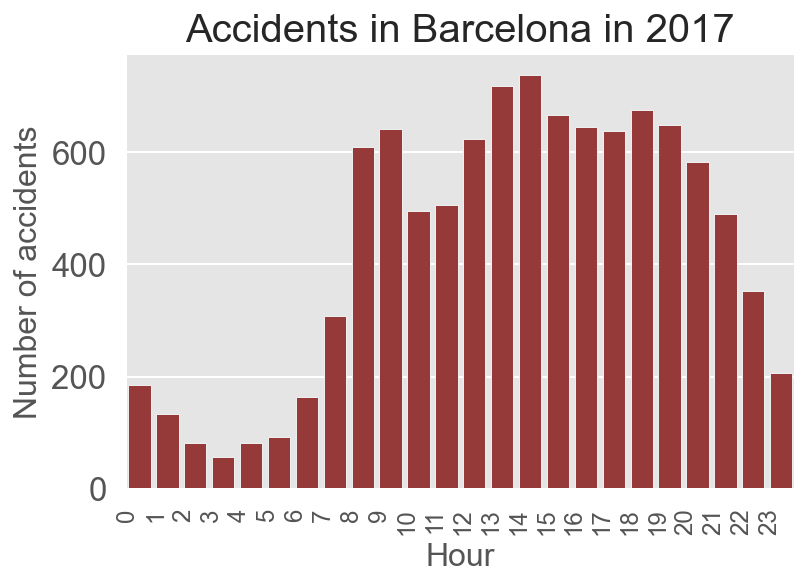

In [135]:
# car accidents by hour
p = sns.countplot(x=accidents['date'].dt.hour, data=accidents, color='brown')
# rotate x-axis labels
plt.setp(p.get_xticklabels(), rotation=90, horizontalalignment='right', fontweight='light', fontsize='large');
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

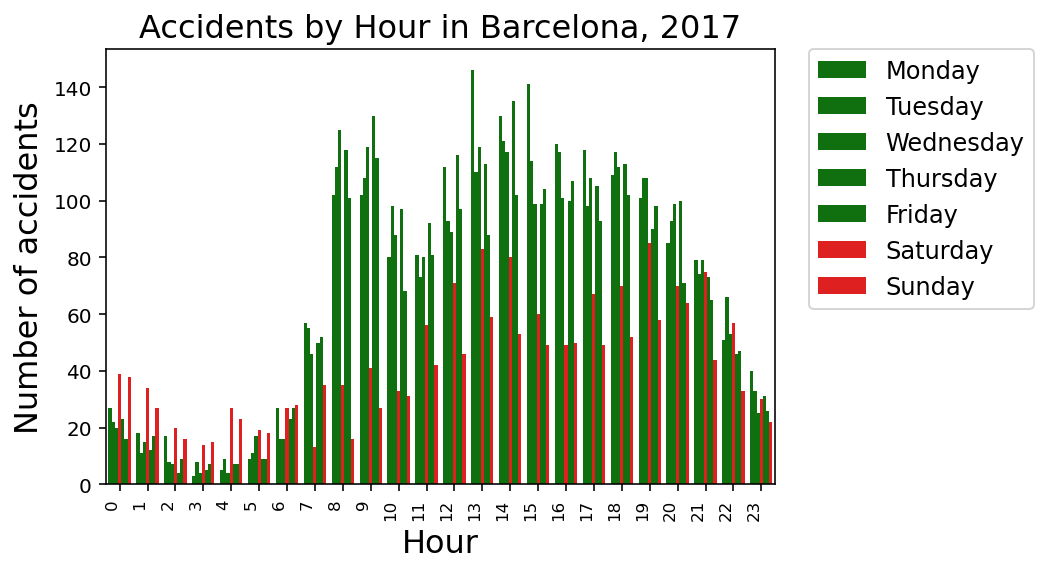

In [90]:
#sns barplot of accidents by hour and hue by week day and flip axes
order = [5,4,2,1,0,3,6]
clrs = ['green', 'green', 'green', 'red', 'green', 'green', 'red']
p = sns.countplot(x=accidents['date'].dt.hour, data=accidents, palette=clrs, hue='weekday')
#reduce legend size and move
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
);
plt.title('Accidents by Hour in Barcelona, 2017', fontsize=16);
plt.xlabel('Hour', fontsize=16);
plt.ylabel('Number of accidents', fontsize=16);



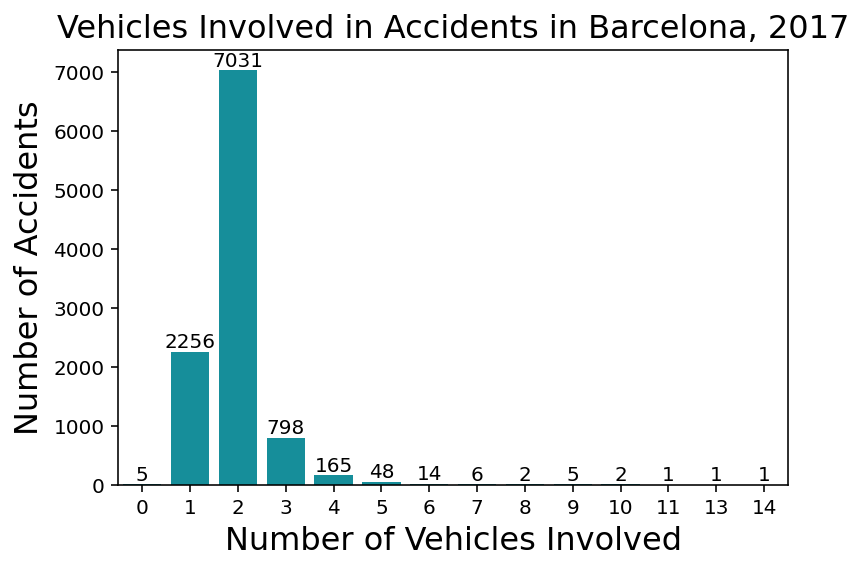

In [99]:
#plot vehicles_involved
p = sns.countplot(x=accidents['vehicles_involved'], data=accidents, color='#00A0B0')
#add count on top of bars
p.bar_label(p.containers[0]);
plt.title('Vehicles Involved in Accidents in Barcelona, 2017', fontsize=16);
plt.xlabel('Number of Vehicles Involved', fontsize=16);
plt.ylabel('Number of Accidents', fontsize=16);
    

In [166]:
#vehicles involved table
accidents['vehicles_involved'].value_counts()

2     7031
1     2256
3      798
4      165
5       48
6       14
7        6
9        5
0        5
8        2
10       2
13       1
11       1
14       1
Name: vehicles_involved, dtype: int64

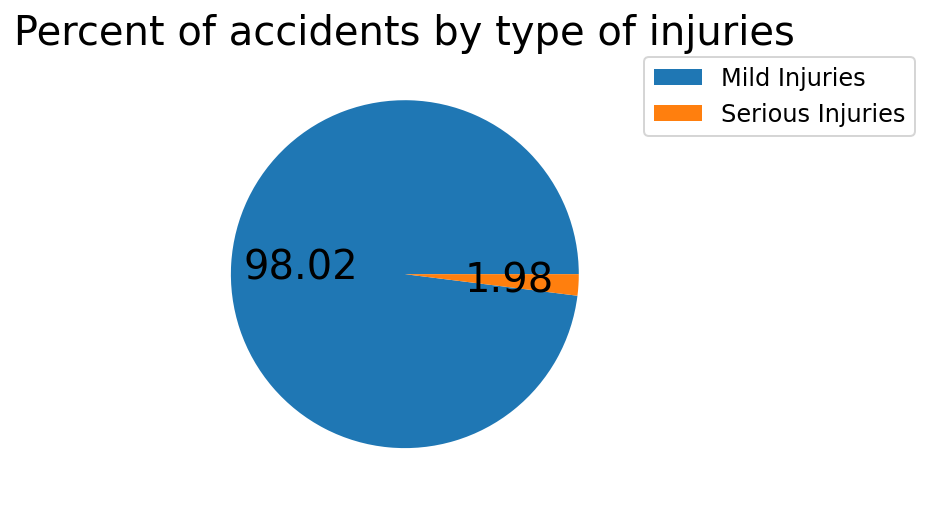

In [105]:
#pie chart of injuries
accidents[['mild_injuries', 'serious_injuries']].sum().plot.pie(autopct='%.2f', textprops={'fontsize': 20}, labels=["",""])
#set title
plt.title('Percent of accidents by type of injuries', fontsize=20)
plt.ylabel("")
plt.legend(labels=['Mild Injuries', 'Serious Injuries'], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12)


In [109]:
#serious + mild injuries
accidents['total_injuries'] = accidents['serious_injuries'] + accidents['mild_injuries']

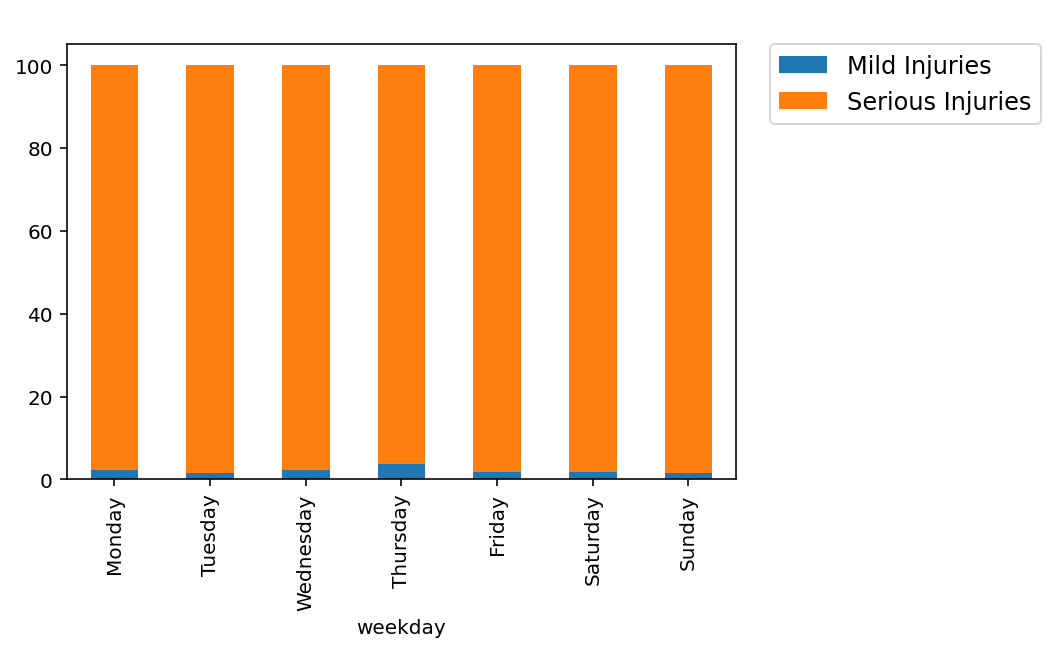

In [139]:
## Number of serious injuries per day of the week
serious = accidents['serious_injuries'].groupby(accidents['weekday']).sum()
mild = accidents['mild_injuries'].groupby(accidents['weekday']).sum()
total = accidents['total_injuries'].groupby(accidents['weekday']).sum()
####

####

###
percent_serious = serious / total * 100
percent_mild = mild / total * 100
#concatenate percent_serious and percent_mild
serious_mild = pd.concat([percent_serious, percent_mild], axis=1)
serious_mild = serious_mild.rename(columns={0: 'serious_injuries', 1: 'mild_injuries'}).reset_index()
serious_mild
serious_mild.plot(x='weekday', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.legend(labels=['Mild Injuries', 'Serious Injuries'], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12, labelcolor='black')
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks([0,1,2,3,4,5,6],order);

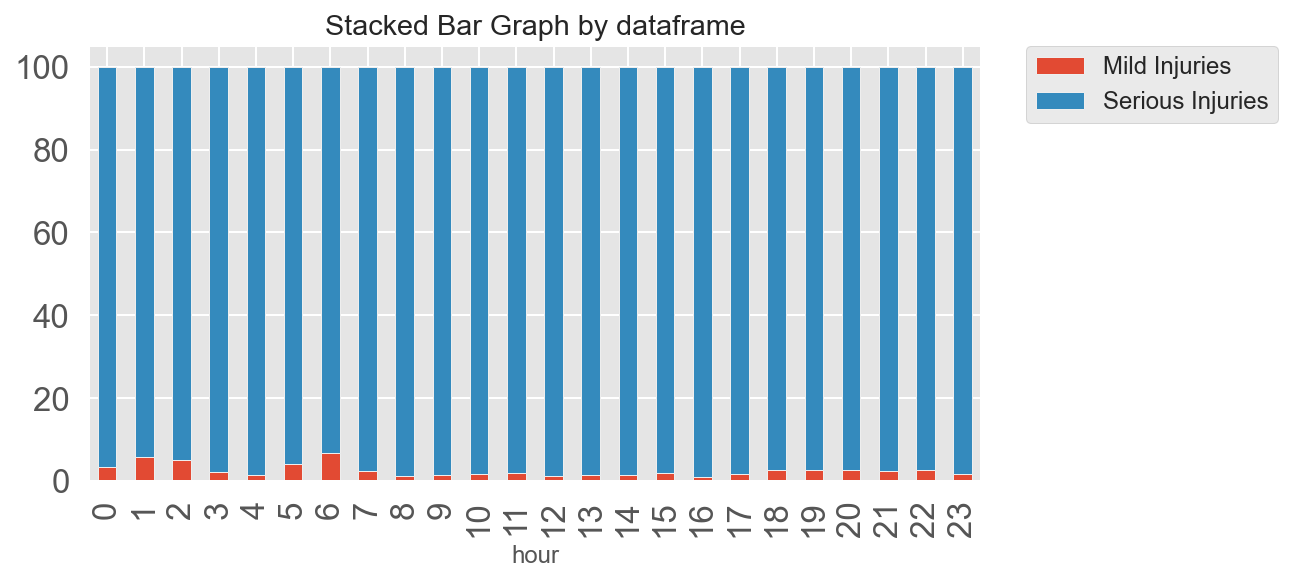

In [249]:
serious_hour = accidents['serious_injuries'].groupby(accidents['date'].dt.hour).sum()
mild_hour = accidents['mild_injuries'].groupby(accidents['date'].dt.hour).sum()
total_hour = accidents['total_injuries'].groupby(accidents['date'].dt.hour).sum()
percent_serious_hour = serious_hour / total_hour * 100
percent_mild_hour = mild_hour / total_hour * 100
serious_mild_hour = pd.concat([percent_serious_hour, percent_mild_hour], axis=1)
serious_mild_hour = serious_mild_hour.rename(columns={0: 'serious_injuries', 1: 'mild_injuries'}).reset_index()
# rename date column to 'hour'
serious_mild_hour = serious_mild_hour.rename(columns={'date': 'hour'})
serious_mild_hour.plot(x='hour', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.legend(labels=['Mild Injuries', 'Serious Injuries'], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12)


In [260]:
fig = px.scatter_geo(accidents,lat='latitude',lon='longitude', hover_name="total_injuries", size='total_injuries', color='total_injuries', animation_frame=sorted(accidents['date'].dt.hour), size_max=50, color_continuous_scale='viridis', title='Accidents in Barcelona in 2017', projection='equirectangular', labels={'total_injuries':'Total Injuries'}, width=800, height=600, template='plotly_white', opacity=0.8)
fig.update_geos(fitbounds="locations")
fig.show()

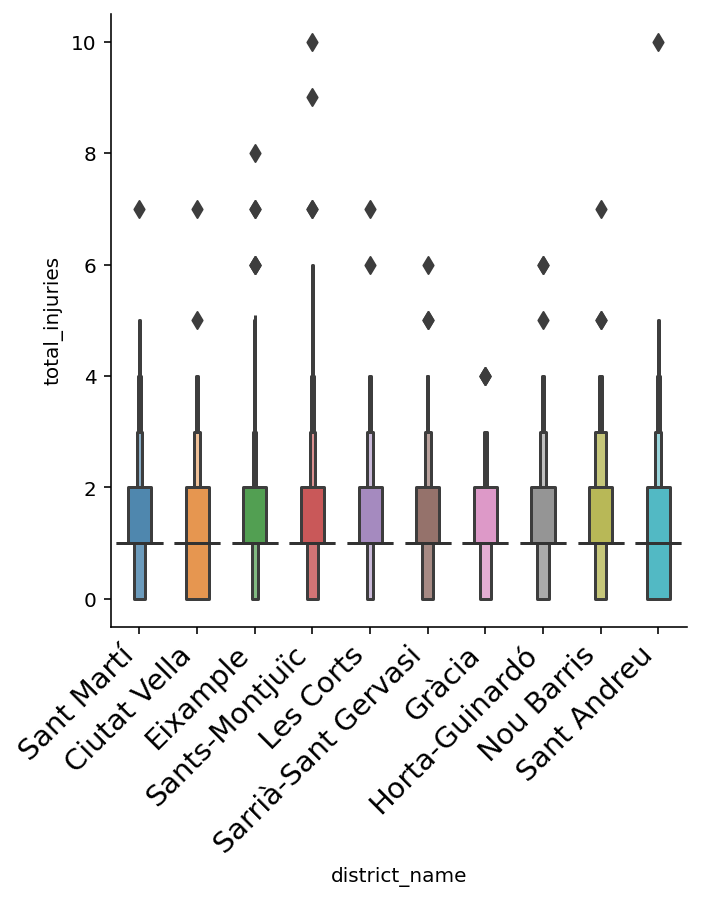

In [151]:
sns.catplot(x = "district_name", y = "total_injuries", data = accidents[accidents['district_name'] != 'Unknown'], ci = None, kind='boxen')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

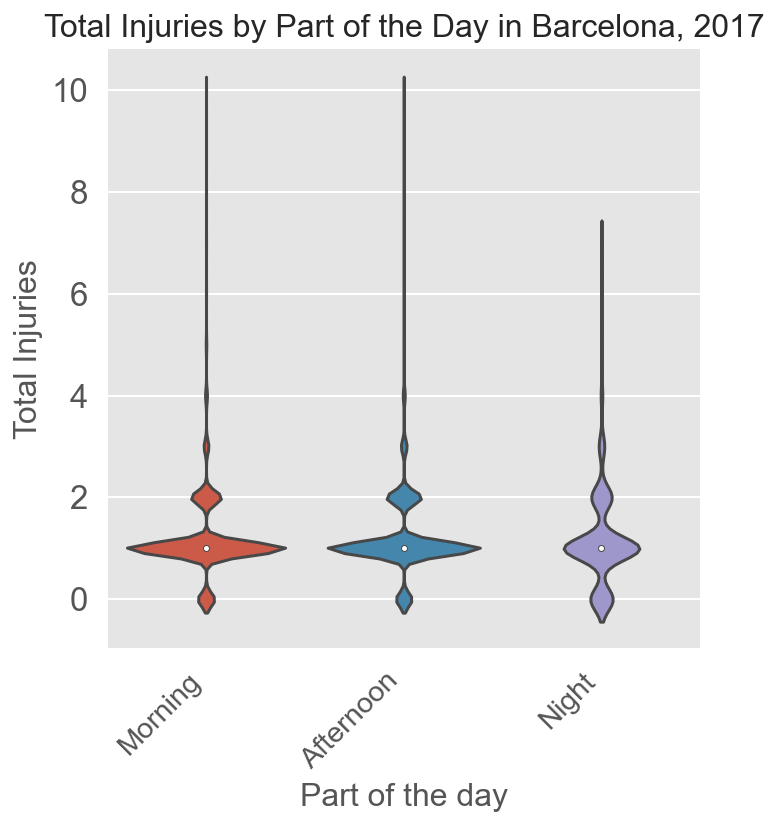

In [157]:
sns.catplot(x = "part_of_the_day", y = "total_injuries", data = accidents, kind='violin')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
#set labels
plt.xlabel('Part of the day', fontsize=16);
plt.ylabel('Total Injuries', fontsize=16);
plt.title('Total Injuries by Part of the Day in Barcelona, 2017', fontsize=16);

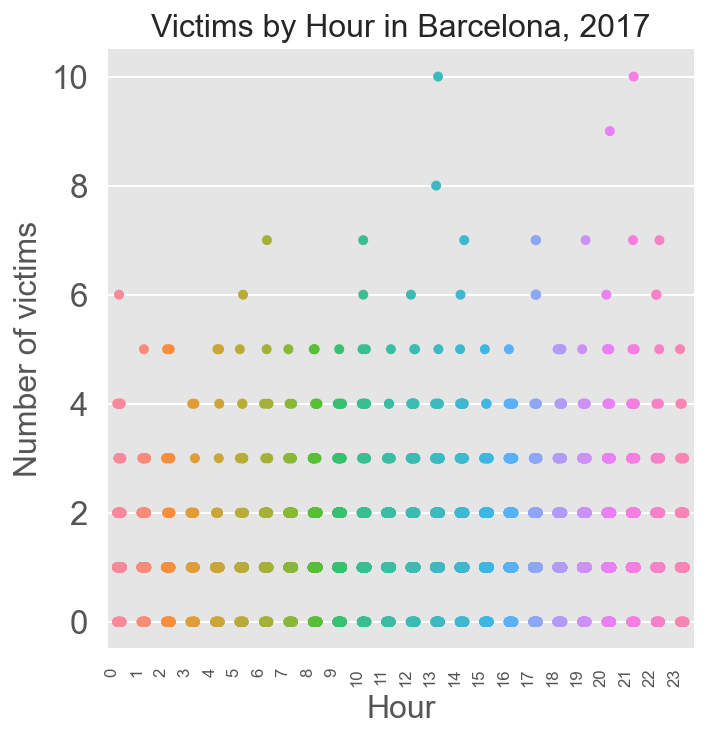

In [167]:
#plot victims vs hour
sns.catplot(x = "hour", y = "victims", data = accidents)
#set labels
plt.xlabel('Hour', fontsize=16);
plt.ylabel('Number of victims', fontsize=16);
plt.title('Victims by Hour in Barcelona, 2017', fontsize=16);
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
);


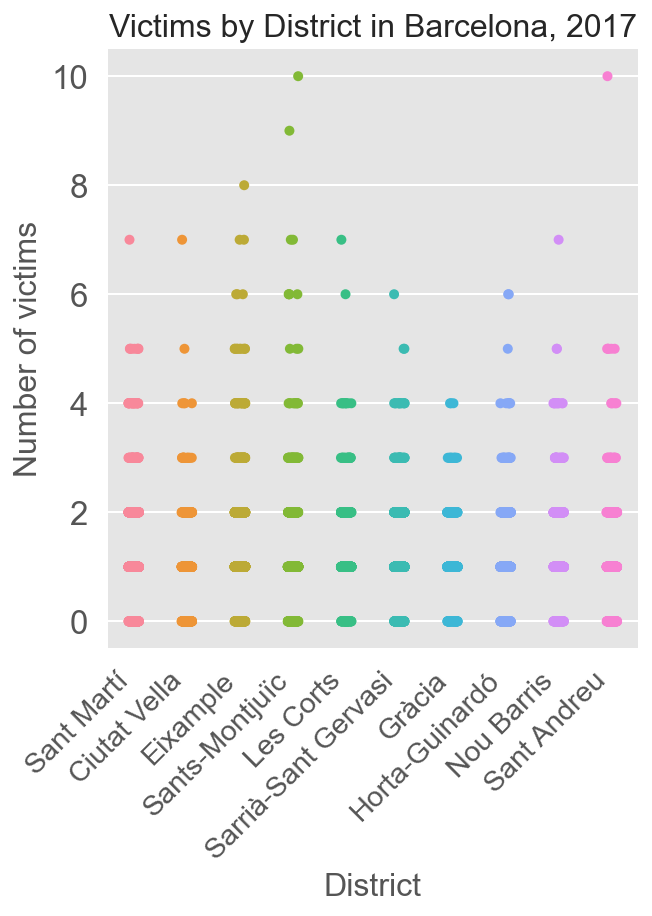

In [169]:
 # plot victims vs district
sns.catplot(x = "district_name", y = "victims", data = accidents[accidents['district_name'] != 'Unknown'])
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large');
#set labels
plt.xlabel('District', fontsize=16);
plt.ylabel('Number of victims', fontsize=16);
plt.title('Victims by District in Barcelona, 2017', fontsize=16);

In [ ]:
accidents.groupby('district_name').count()['id'].sort_values(ascending=False).head(10)


district_name
Eixample               3029
Sant Martí             1336
Sants-Montjuïc         1104
Sarrià-Sant Gervasi    1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Name: id, dtype: int64

In [ ]:
#plot neighborhood_name in Sant Martí vs serious injuries
accidents.groupby('neighborhood_name').count()['id'].sort_values(ascending=False).head(10)


neighborhood_name
la Dreta de l'Eixample             1167
l'Antiga Esquerra de l'Eixample     588
la Nova Esquerra de l'Eixample      387
Sant Gervasi - Galvany              385
la Sagrada Família                  377
les Corts                           319
el Fort Pienc                       277
la Marina del Prat Vermell          249
el Poble-sec                        234
Sant Antoni                         233
Name: id, dtype: int64

In [170]:
#get entries in neighborhood_name column where district_name is Eixample
accidents[accidents.district_name == 'Eixample'].groupby('neighborhood_name').count()['id'].sort_values(ascending=False).head(10)

neighborhood_name
la Dreta de l'Eixample             1166
l'Antiga Esquerra de l'Eixample     588
la Nova Esquerra de l'Eixample      387
la Sagrada Família                  377
el Fort Pienc                       277
Sant Antoni                         233
Name: id, dtype: int64

In [171]:
accidents[accidents.district_name == 'Eixample'].groupby('street').count()['id'].sort_values(ascending=False).head(10)

street
Corts Catalanes                                       116
Aragó                                                  85
Diagonal                                               46
València                                               39
GV CORTS CATALANES                                     29
Mallorca                                               27
Tetuan                                                 26
Comte d'Urgell                                         25
Gràcia                                                 24
Diputació                                              23
Name: id, dtype: int64

<AxesSubplot:title={'center':'Top 10 Streets in Eixample, 2017'}, xlabel='street'>

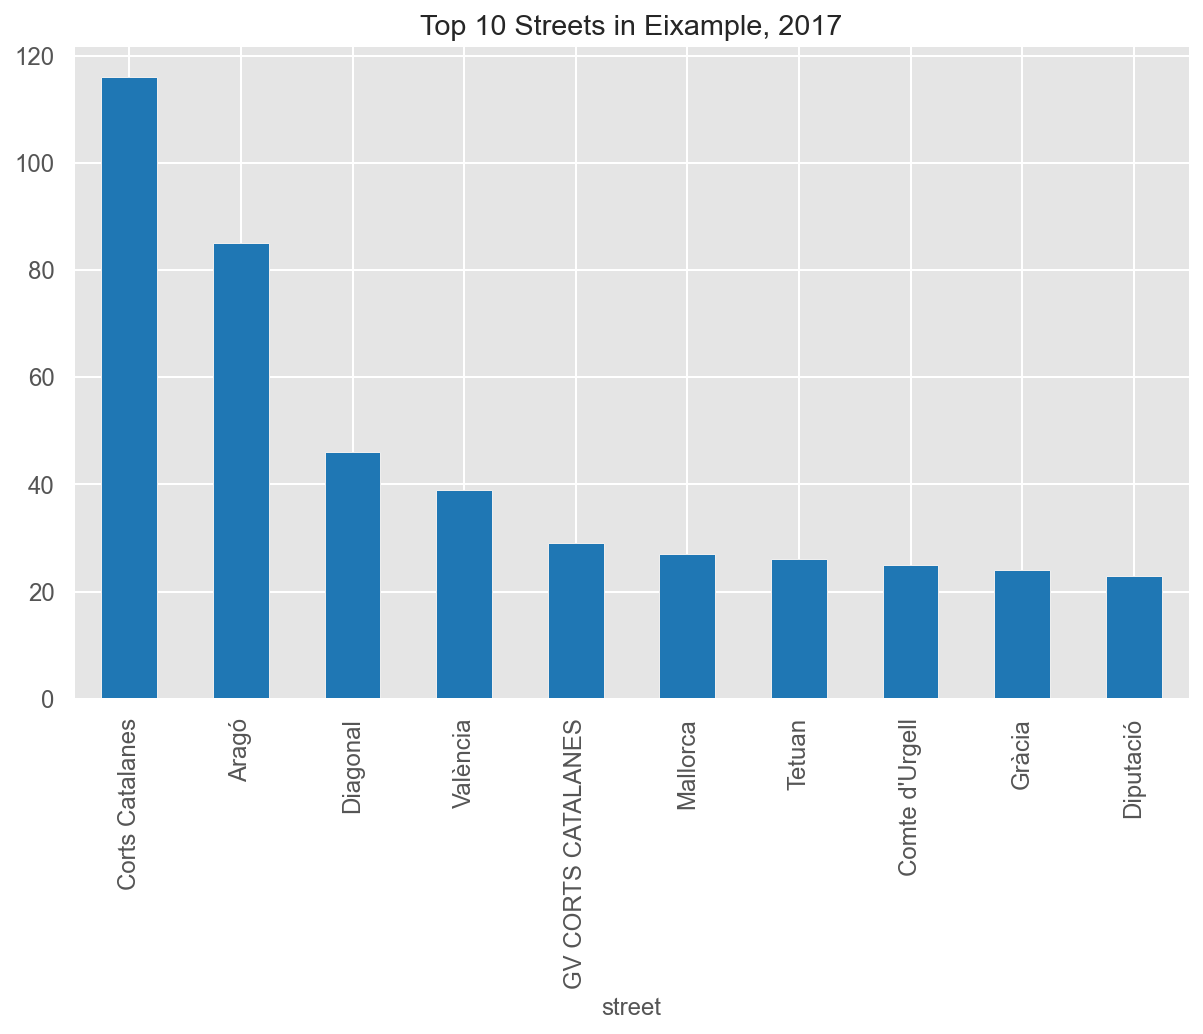

In [205]:
#plot top 10 streets in Sant Martí vs serious injuries
streets = accidents[accidents.district_name == 'Eixample'].groupby('street').count()['id'].sort_values(ascending=False).head(10).reset_index()
streets = pd.DataFrame(streets)
streets['street'] = streets['street'].str.strip()
streets.plot(x='street', y='id', kind='bar', title='Accidents Eixample, 2017', fontsize=12, color='#1f77b4', legend=False)
plt.xlabel('Street', fontsize=16);
plt.ylabel('Number of accidents', fontsize=16);
# sns.catplot(x = "street", y = "total_injuries", data = pd.DataFrame(streets))
# plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large');

C:\Users\Sultan\AppData\Local\Temp\ipykernel_20028\2076012359.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(x = "street", y = "serious_injuries", data = accidents[accidents.neighborhood_name == 'Provençals del Poblenou'][accidents.serious_injuries > 0])


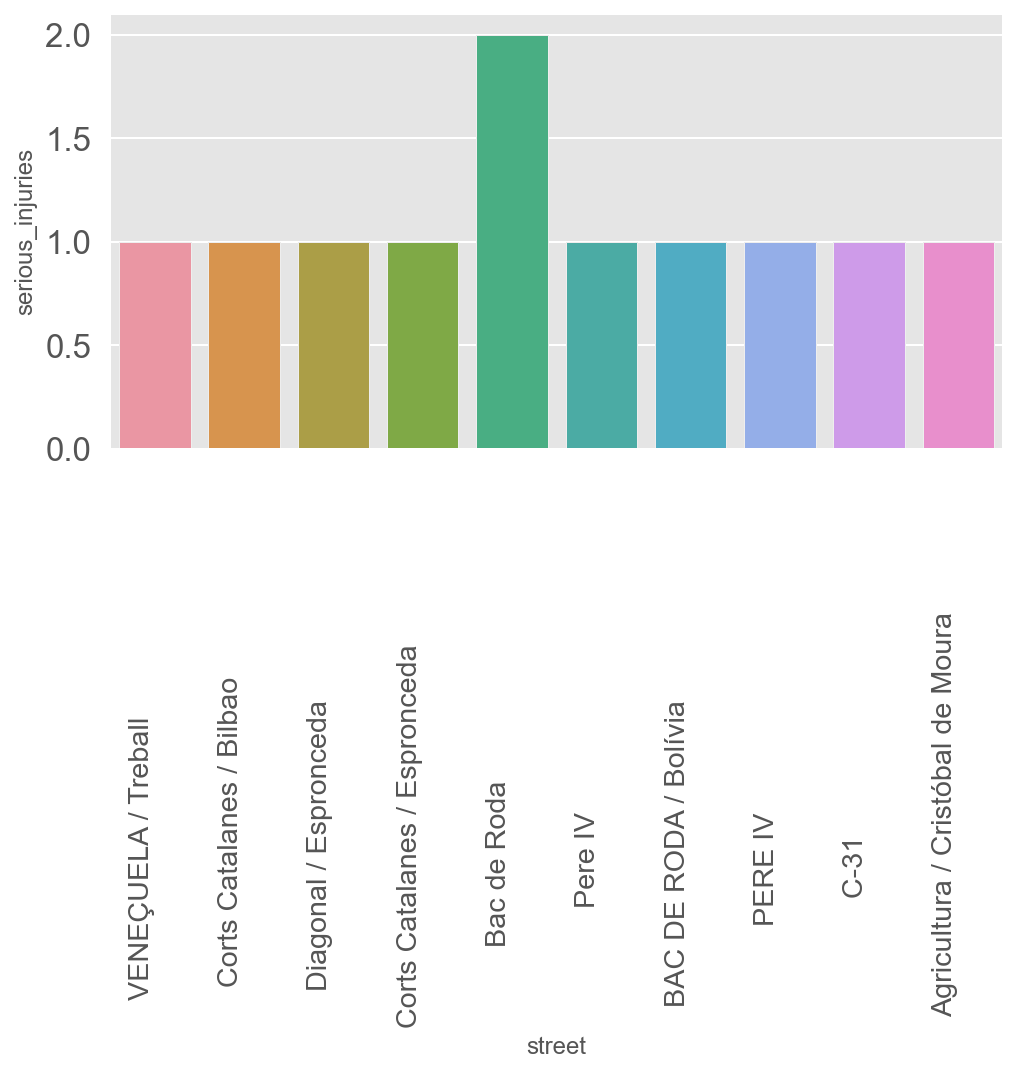

In [ ]:
#plot street name in Provençal del Poblenou vs serious injuries greater than 0
sns.barplot(x = "street", y = "serious_injuries", data = accidents[accidents.neighborhood_name == 'Provençals del Poblenou'][accidents.serious_injuries > 0])
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-large');

In [ ]:
accidents.columns[accidents.isin(['Unknown']).any()]  

Index(['district_name', 'neighborhood_name'], dtype='object')

In [273]:
len(accidents[accidents.district_name=="Unknown"])

27